In [38]:
import librosa
import librosa.display
import pandas as pd
import os
import datetime
import matplotlib.pyplot as plt
import numpy as np
import IPython.display as ipd
import scipy
import glob
import numpy as np
import math
import warnings
import pickle
from sklearn.utils import shuffle
import zipfile
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import datasets, models, transforms
import cv2 as cv  # OpenCV


In [39]:
path_to_noise_dataset = "../dataset/noise_dataset/audio/"
all_noise_filenames = glob.glob(os.path.join(path_to_noise_dataset, 'fold*', '*.*'))

fs = 16e3 # Hz sampling frequency
windowLength = 256
fftLength = windowLength
overlap = round(0.25 * windowLength) # overlap of 75%
window = scipy.signal.hamming(windowLength, sym=False)

In [40]:
def read_audio(filepath, sample_rate, normalize=True):
    """Read an audio file and return it as a numpy array"""
    audio, sr = librosa.load(filepath, sr=sample_rate)
    #Normalization?
    if normalize:
        div_fac = 1 / np.max(np.abs(audio)) / 3.0
        audio = audio * div_fac
    return audio, sr

In [41]:
random_noise_signal_index = np.random.randint(0, len(all_noise_filenames) - 1)

noice_audio, sampl_rate_noice = read_audio(all_noise_filenames[random_noise_signal_index], sample_rate=fs)


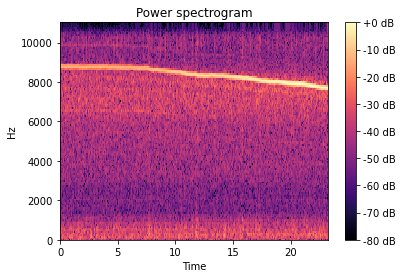

In [42]:
noice_audio_stft = librosa.stft(noice_audio, n_fft=fftLength, win_length=windowLength, hop_length=overlap, window=window, center=True)
noice_audio_stft_abs = np.abs(noice_audio_stft)
noice_audio_stft_abs_db = librosa.amplitude_to_db(noice_audio_stft_abs,ref=np.max)

fig, ax = plt.subplots()
img = librosa.display.specshow(noice_audio_stft_abs_db, y_axis='linear', x_axis='time', ax=ax)
ax.set_title('Power spectrogram')
fig.colorbar(img, ax=ax, format="%+2.0f dB")


ipd.Audio(data=noice_audio, rate=sampl_rate_noice) # load a local WAV file